In [1]:
pip install prophet matplotlib pandas seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]m4/5 [prophet]]
Note: you may need to restart the kernel to use updated packages.


10:03:01 - cmdstanpy - INFO - Chain [1] start processing
10:03:02 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


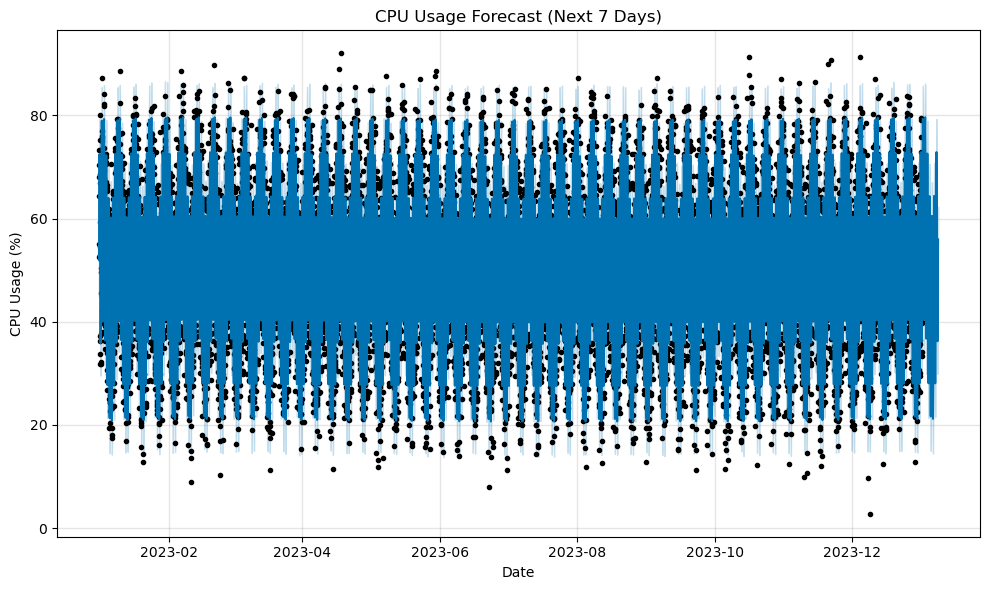

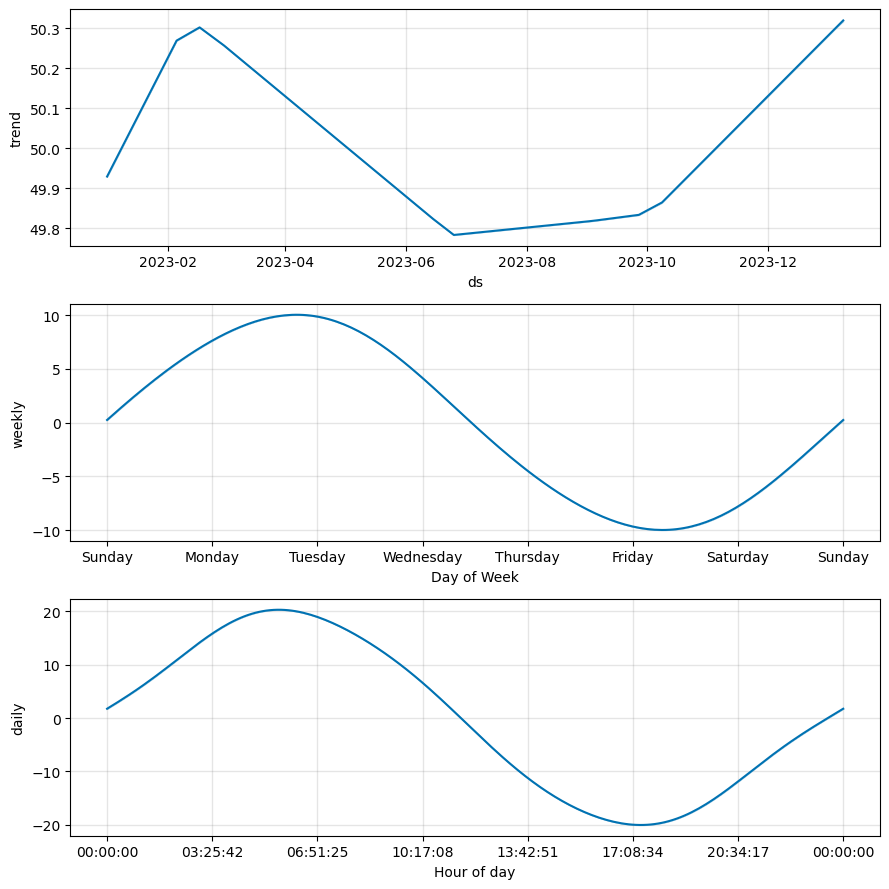

In [2]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (if not already loaded)
df = pd.read_csv("/Users/mrugankulkarni/Developer/IT resource optimization/enhanced_resource_usage_2023.csv", parse_dates=["timestamp"])

# Prophet requires specific column names: 'ds' for date, 'y' for value
cpu_df = df[["timestamp", "cpu_usage"]].rename(columns={"timestamp": "ds", "cpu_usage": "y"})

# Initialize and fit the model
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=False)
model.fit(cpu_df)

# Forecast for the next 7 days (168 hours)
future = model.make_future_dataframe(periods=168, freq='H')
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("CPU Usage Forecast (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("CPU Usage (%)")
plt.tight_layout()
plt.show()

# Plot forecast components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [3]:
import numpy as np

# Filter the future 7 days forecasted data
forecast_future = forecast[forecast["ds"] > df["timestamp"].max()]

# Determine how many servers are needed per hour
# Each server handles up to 70% safely
forecast_future["required_servers"] = np.ceil(forecast_future["yhat"] / 70)

# Simulate a baseline: Assume 2 servers are running
baseline_servers = 2
forecast_future["excess_servers"] = forecast_future["required_servers"] - baseline_servers

# Calculate cost (positive = need more servers, negative = overprovisioned)
cost_per_server_per_hour = 15  # in INR
forecast_future["cost_impact"] = forecast_future["excess_servers"] * cost_per_server_per_hour

# Total projected 7-day impact
total_cost = forecast_future["cost_impact"].sum()
scale_up_hours = (forecast_future["excess_servers"] > 0).sum()
scale_down_hours = (forecast_future["excess_servers"] < 0).sum()

# Summary
print("\n--- Resource Recommendation Summary ---")
print(f"Total Cost Impact for Next 7 Days: ₹{total_cost:.2f}")
print(f"Scale UP needed in {scale_up_hours} hours")
print(f"Scale DOWN possible in {scale_down_hours} hours")



--- Resource Recommendation Summary ---
Total Cost Impact for Next 7 Days: ₹-2205.00
Scale UP needed in 0 hours
Scale DOWN possible in 147 hours


/var/folders/51/n7gj7mhs59z2jtl0twpt7mhh0000gn/T/ipykernel_76772/3587802884.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_future["required_servers"] = np.ceil(forecast_future["yhat"] / 70)
/var/folders/51/n7gj7mhs59z2jtl0twpt7mhh0000gn/T/ipykernel_76772/3587802884.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_future["excess_servers"] = forecast_future["required_servers"] - baseline_servers
/var/folders/51/n7gj7mhs59z2jtl0twpt7mhh0000gn/T/ipykernel_76772/3587802884.py:16: Setti

10:13:48 - cmdstanpy - INFO - Chain [1] start processing
10:13:48 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
10:13:49 - cmdstanpy - INFO - Chain [1] start processing
10:13:50 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
10:13:51 - cmdstanpy - INFO - Chain [1] start processing
10:13:51 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
/var/folders/51/n7gj7mhs59z2jtl0twpt7mhh0000gn/T/ipykernel_76772/3054820948.


--- Enhanced Resource Recommendation Summary ---
Total Cost Impact for Next 7 Days: ₹-94410.00
Scale UP needed in 684 hours
Scale DOWN possible in 6978 hours


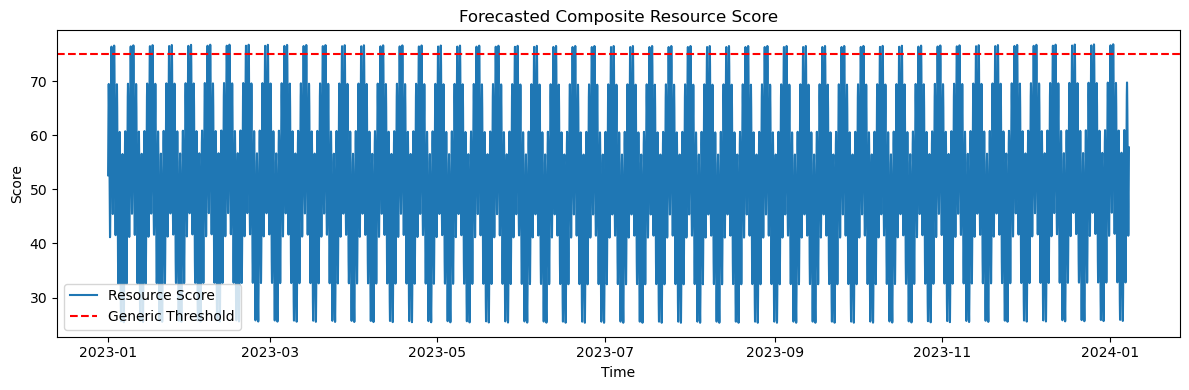

In [5]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/mrugankulkarni/Developer/IT resource optimization/enhanced_resource_usage_2023.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Forecasting function using Prophet
def forecast_metric(df, metric):
    data = df[['timestamp', metric]].rename(columns={"timestamp": "ds", metric: "y"})
    model = Prophet(daily_seasonality=True, weekly_seasonality=True)
    model.fit(data)

    future = model.make_future_dataframe(periods=24*7, freq='H')  # 7 days ahead
    forecast = model.predict(future)

    return forecast[['ds', 'yhat']].set_index('ds').rename(columns={'yhat': metric + '_forecast'})

# Forecast all metrics
cpu_forecast = forecast_metric(df, 'cpu_usage')
mem_forecast = forecast_metric(df, 'memory_usage')
disk_forecast = forecast_metric(df, 'disk_io')

# Merge forecasts
forecast_df = cpu_forecast.join(mem_forecast).join(disk_forecast)
forecast_df = forecast_df.reset_index().rename(columns={'ds': 'timestamp'})

# Align business criticality from past 7 days for simplicity
recent_criticality = df[['timestamp', 'business_criticality']]
forecast_df = forecast_df.merge(recent_criticality, on='timestamp', how='left').fillna(method='ffill')

# Normalize forecasts (optional, in case of large scale difference)
for col in ['cpu_usage_forecast', 'memory_usage_forecast', 'disk_io_forecast']:
    forecast_df[col] = np.clip(forecast_df[col], 0, 100)  # keep within [0,100]

# Weighted resource score
forecast_df['resource_score'] = (
    0.5 * forecast_df['cpu_usage_forecast'] +
    0.3 * forecast_df['memory_usage_forecast'] +
    0.2 * forecast_df['disk_io_forecast']
)

# Thresholds by business criticality
thresholds = {
    'Critical': 65,
    'Moderate': 75,
    'Low': 85
}

# Apply thresholds to decide scaling
def classify_action(row):
    threshold = thresholds.get(row['business_criticality'], 75)
    if row['resource_score'] > threshold:
        return "Scale Up"
    elif row['resource_score'] < (threshold - 10):
        return "Scale Down"
    else:
        return "No Action"

forecast_df['action'] = forecast_df.apply(classify_action, axis=1)

# Cost impact estimation
COST_PER_HOUR = 15  # ₹ per server per hour
forecast_df['cost_impact'] = forecast_df['action'].map({
    "Scale Up": COST_PER_HOUR,
    "Scale Down": -COST_PER_HOUR,
    "No Action": 0
})

# Summary
total_cost = forecast_df['cost_impact'].sum()
scale_up_hours = (forecast_df['action'] == 'Scale Up').sum()
scale_down_hours = (forecast_df['action'] == 'Scale Down').sum()

print("\n--- Enhanced Resource Recommendation Summary ---")
print(f"Total Cost Impact for Next 7 Days: ₹{total_cost:.2f}")
print(f"Scale UP needed in {scale_up_hours} hours")
print(f"Scale DOWN possible in {scale_down_hours} hours")

# Optional: save to CSV
forecast_df.to_csv("forecasted_recommendations.csv", index=False)

# Plot resource score
plt.figure(figsize=(12, 4))
plt.plot(forecast_df['timestamp'], forecast_df['resource_score'], label='Resource Score')
plt.title('Forecasted Composite Resource Score')
plt.xlabel('Time')
plt.ylabel('Score')
plt.axhline(75, color='r', linestyle='--', label='Generic Threshold')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
import numpy as np

# General usage simulation function (used for CPU, memory, disk, or network)
def simulate_usage(n, base, noise_level, daily_amp, weekly_amp):
    hourly = np.sin(np.linspace(0, 2 * np.pi, 24))  # daily pattern
    weekly = np.sin(np.linspace(0, 2 * np.pi, 168))  # weekly pattern
    hourly_pattern = np.tile(hourly, n // 24 + 1)[:n]
    weekly_pattern = np.tile(weekly, n // 168 + 1)[:n]
    noise = np.random.normal(0, noise_level, n)
    return base + daily_amp * hourly_pattern + weekly_amp * weekly_pattern + noise

# Network usage simulation using the above
def simulate_network_usage(df):
    n = len(df)
    base = 300  # Mbps
    noise_level = 20
    daily_amp = 100
    weekly_amp = 50
    network_usage = simulate_usage(n, base, noise_level, daily_amp, weekly_amp)
    return np.clip(network_usage, 50, 1000)  # realistic Mbps values

# Add to DataFrame
df['network_usage_mbps'] = simulate_network_usage(df)
print(df[['timestamp', 'network_usage_mbps']].head())


            timestamp  network_usage_mbps
0 2023-01-01 00:00:00          310.366046
1 2023-01-01 01:00:00          323.067493
2 2023-01-01 02:00:00          347.471699
3 2023-01-01 03:00:00          384.177531
4 2023-01-01 04:00:00          355.440685


In [12]:
# --- Recommendation Logic for Network Usage ---

def recommend_network_scaling(forecast_df, high_thresh=900, low_thresh=300, cost_per_hour_high=15, cost_per_hour_low=5):
    forecast_df['timestamp'] = pd.to_datetime(forecast_df['ds'])
    forecast_df['network_usage_mbps'] = forecast_df['yhat']
    
    scale_up_hours = forecast_df[forecast_df['network_usage_mbps'] > high_thresh]
    scale_down_hours = forecast_df[forecast_df['network_usage_mbps'] < low_thresh]
    
    total_up_hours = len(scale_up_hours)
    total_down_hours = len(scale_down_hours)
    
    # Cost impact estimation
    up_cost = total_up_hours * cost_per_hour_high
    down_saving = total_down_hours * cost_per_hour_low
    net_cost_impact = down_saving - up_cost
    
    print("\n--- Network Usage Recommendation Summary ---")
    print(f"Total Cost Impact for Next 7 Days: ₹{net_cost_impact:.2f}")
    print(f"Scale UP needed in {total_up_hours} hours")
    print(f"Scale DOWN possible in {total_down_hours} hours")
    
    return scale_up_hours[['timestamp', 'network_usage_mbps']], scale_down_hours[['timestamp', 'network_usage_mbps']]

# Apply on forecasted network usage
scale_up_net, scale_down_net = recommend_network_scaling(forecast_network)



--- Network Usage Recommendation Summary ---
Total Cost Impact for Next 7 Days: ₹22350.00
Scale UP needed in 0 hours
Scale DOWN possible in 4470 hours


In [17]:
import numpy as np
import pandas as pd

# Load your existing dataset
df = pd.read_csv("/Users/mrugankulkarni/Developer/IT resource optimization/enhanced_resource_usage_2023.csv", parse_dates=["timestamp"])

# Define simulation function
def simulate_usage(base, noise_level, daily_amp, weekly_amp, size):
    time = np.arange(size)
    daily = daily_amp * np.sin(2 * np.pi * time / 24)
    weekly = weekly_amp * np.sin(2 * np.pi * time / (24 * 7))
    noise = np.random.normal(0, noise_level, size)
    return base + daily + weekly + noise

# Simulate network usage and clip values
df["network_usage_mbps"] = simulate_usage(
    base=300, noise_level=40, daily_amp=100, weekly_amp=50, size=len(df)
)
df["network_usage_mbps"] = np.clip(df["network_usage_mbps"], 50, 1000)

# Save back to disk (overwrite the file)
df.to_csv("/Users/mrugankulkarni/Developer/IT resource optimization/enhanced_resource_usage_2023.csv", index=False)


In [18]:
# Reload updated dataset
df = pd.read_csv("/Users/mrugankulkarni/Developer/IT resource optimization/enhanced_resource_usage_2023.csv", parse_dates=["timestamp"])

# Prepare data for Prophet
net_df = df[["timestamp", "network_usage_mbps"]].rename(columns={"timestamp": "ds", "network_usage_mbps": "y"})

10:30:28 - cmdstanpy - INFO - Chain [1] start processing
10:30:28 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


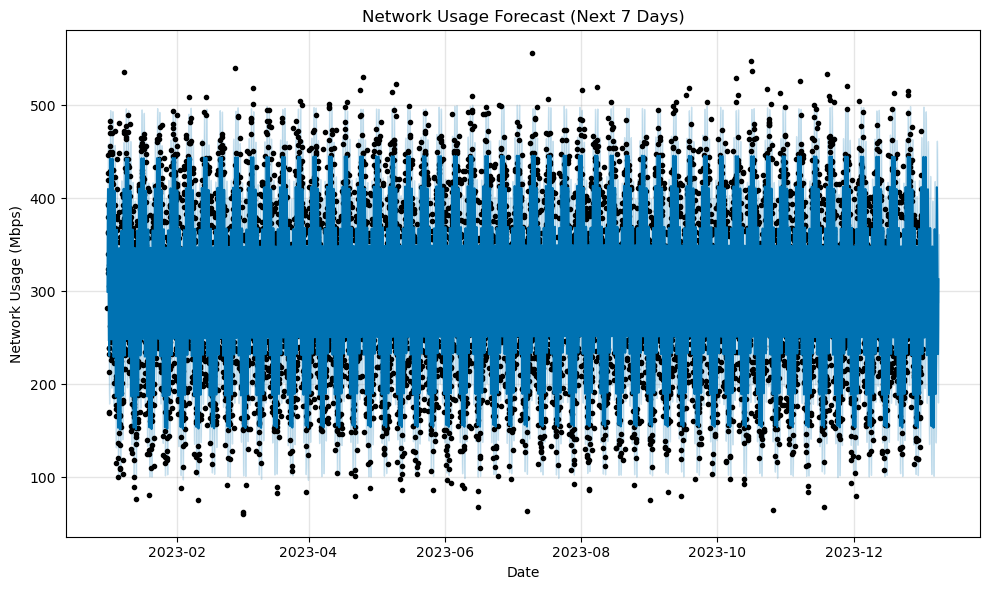

In [19]:
from prophet import Prophet

# Create and fit Prophet model for network usage
net_model = Prophet(daily_seasonality=True, weekly_seasonality=True)
net_model.fit(net_df)

# Create future dataframe
net_future = net_model.make_future_dataframe(periods=168, freq='H')
net_forecast = net_model.predict(net_future)

# Optional: visualize the forecast
net_model.plot(net_forecast)
plt.title("Network Usage Forecast (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Network Usage (Mbps)")
plt.tight_layout()
plt.show()


In [20]:
# Extract and rename relevant columns
cpu_forecast_trimmed = cpu_forecast[["ds", "yhat"]].rename(columns={"ds": "timestamp", "yhat": "cpu_forecast"})
net_forecast_trimmed = net_forecast[["ds", "yhat"]].rename(columns={"ds": "timestamp", "yhat": "network_forecast"})

# Merge forecasts on timestamp
combined_forecast = pd.merge(cpu_forecast_trimmed, net_forecast_trimmed, on="timestamp")

# Show a sample
print(combined_forecast.tail(10))


               timestamp  cpu_forecast  network_forecast
8918 2024-01-07 14:00:00     42.814306        278.049026
8919 2024-01-07 15:00:00     39.501237        259.769847
8920 2024-01-07 16:00:00     37.256726        245.086747
8921 2024-01-07 17:00:00     36.217054        235.501016
8922 2024-01-07 18:00:00     36.674313        232.500730
8923 2024-01-07 19:00:00     38.865606        236.842920
8924 2024-01-07 20:00:00     42.619050        248.234078
8925 2024-01-07 21:00:00     47.242929        265.602921
8926 2024-01-07 22:00:00     51.860288        287.615603
8927 2024-01-07 23:00:00     55.962711        312.936076


In [21]:
def classify_load(cpu, network):
    # CPU load level
    if cpu >= 70:
        cpu_level = "High"
    elif cpu >= 40:
        cpu_level = "Medium"
    else:
        cpu_level = "Low"

    # Network load level
    if network >= 600:
        net_level = "High"
    elif network >= 300:
        net_level = "Medium"
    else:
        net_level = "Low"

    # Combined level: pick the higher one
    levels = ["Low", "Medium", "High"]
    combined_level = max(cpu_level, net_level, key=lambda x: levels.index(x))
    return combined_level

# Apply to DataFrame
combined_forecast["load_level"] = combined_forecast.apply(
    lambda row: classify_load(row["cpu_forecast"], row["network_forecast"]),
    axis=1
)

# Show sample
combined_forecast.tail(10)


,timestamp,cpu_forecast,network_forecast,load_level
8918,2024-01-07 14:00:00,42.814306,278.049026,Medium
8919,2024-01-07 15:00:00,39.501237,259.769847,Low
8920,2024-01-07 16:00:00,37.256726,245.086747,Low
8921,2024-01-07 17:00:00,36.217054,235.501016,Low
8922,2024-01-07 18:00:00,36.674313,232.500730,Low
8923,2024-01-07 19:00:00,38.865606,236.842920,Low
8924,2024-01-07 20:00:00,42.619050,248.234078,Medium
8925,2024-01-07 21:00:00,47.242929,265.602921,Medium
8926,2024-01-07 22:00:00,51.860288,287.615603,Medium
8927,2024-01-07 23:00:00,55.962711,312.936076,Medium


In [22]:
# Step 1: Map action based on load level
def recommend_action(load_level):
    if load_level == "High":
        return "Scale UP"
    elif load_level == "Medium":
        return "Maintain"
    else:
        return "Scale DOWN"

# Step 2: Apply to forecast
combined_forecast["scaling_action"] = combined_forecast["load_level"].apply(recommend_action)

# Step 3: See summary
recommendation_summary = combined_forecast["scaling_action"].value_counts()
print("\n--- Scaling Recommendation Summary ---")
print(recommendation_summary)

# Step 4: Preview last few rows
combined_forecast.tail(10)



--- Scaling Recommendation Summary ---
scaling_action
Maintain      5189
Scale DOWN    2623
Scale UP      1116
Name: count, dtype: int64


,timestamp,cpu_forecast,network_forecast,load_level,scaling_action
8918,2024-01-07 14:00:00,42.814306,278.049026,Medium,Maintain
8919,2024-01-07 15:00:00,39.501237,259.769847,Low,Scale DOWN
8920,2024-01-07 16:00:00,37.256726,245.086747,Low,Scale DOWN
8921,2024-01-07 17:00:00,36.217054,235.501016,Low,Scale DOWN
8922,2024-01-07 18:00:00,36.674313,232.500730,Low,Scale DOWN
8923,2024-01-07 19:00:00,38.865606,236.842920,Low,Scale DOWN
8924,2024-01-07 20:00:00,42.619050,248.234078,Medium,Maintain
8925,2024-01-07 21:00:00,47.242929,265.602921,Medium,Maintain
8926,2024-01-07 22:00:00,51.860288,287.615603,Medium,Maintain
8927,2024-01-07 23:00:00,55.962711,312.936076,Medium,Maintain
